In [115]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import librosa
import librosa.display

In [162]:
################# TO RECORD AUDIO FOR 3 SECs INTO output.wav FILE ######################### ==> STARTS HERE
#pip install pipwin
#pipwin install pyaudio
import pyaudio
import wave
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "output.wav"
p = pyaudio.PyAudio()  # Create an interface to PortAudio
print('Recording')
stream = p.open(format=sample_format,channels=channels,rate=fs,frames_per_buffer=chunk,input=True)
frames = []  # Initialize array to store frames
# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()
print('Finished recording')
# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


In [165]:
# import noisereduce as nr 
# from noisereduce.noisereducev1 import reduce_noise
# #load data 
# data,sr=librosa.load("./output.wav")
# # select section of data that is noise 
# noisy_part = data[10000:15000] 
# # perform noise reduction 
# reduced_noise =reduce_noise(audio_clip=data,noise_clip=noisy_part, verbose=True) 

In [164]:
################## TO PLAY RECORDED WAV AUDIO FILE ####################
from pydub import AudioSegment
from pydub.playback import play
filename = './output.wav'
sound = AudioSegment.from_wav(filename)  
play(sound)

In [134]:
# Read stored audio files for comparison
data1,sr1=librosa.load("../DataBase/names/Maram.wav")
data2,sr2=librosa.load("./output.wav")
data3,sr3=librosa.load("../DataBase/names/Maram.wav")
data4,sr4=librosa.load("../DataBase/names/Mayar.wav")

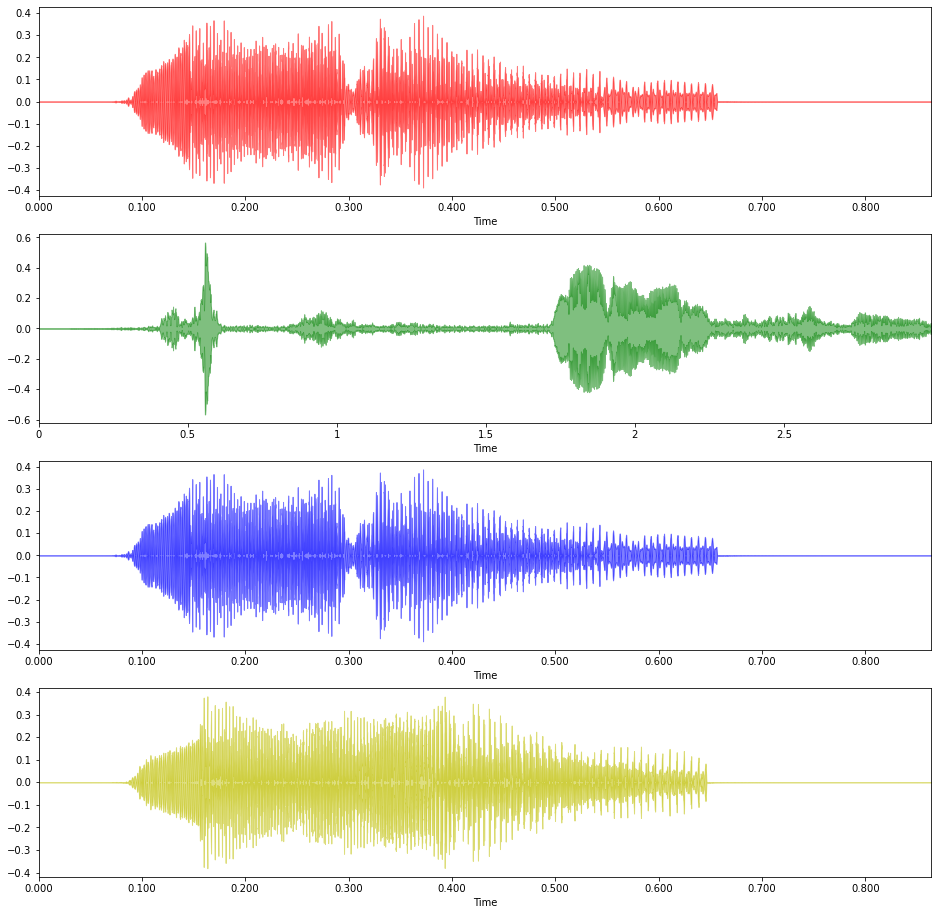

In [135]:
plt.figure(figsize=(16,16))
plt.subplot(4, 1, 1)
librosa.display.waveplot(data1,sr1,color='r',alpha=0.5)
# plt.figure(figsize=(18,4))
plt.subplot(4, 1, 2)
librosa.display.waveplot(data2,sr2,color='g',alpha=0.5)
# plt.figure(figsize=(18,4))
plt.subplot(4, 1, 3)
librosa.display.waveplot(data3,sr3,color='b',alpha=0.5)
# plt.figure(figsize=(18,4))
plt.subplot(4, 1, 4)
librosa.display.waveplot(data4,sr4,color='y',alpha=0.5)


In [136]:
n_fft = 4410
hop_size = 512
mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
mfcc3 = librosa.feature.mfcc(y=data3, sr=sr3, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
mfcc4 = librosa.feature.mfcc(y=data4, sr=sr4, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)

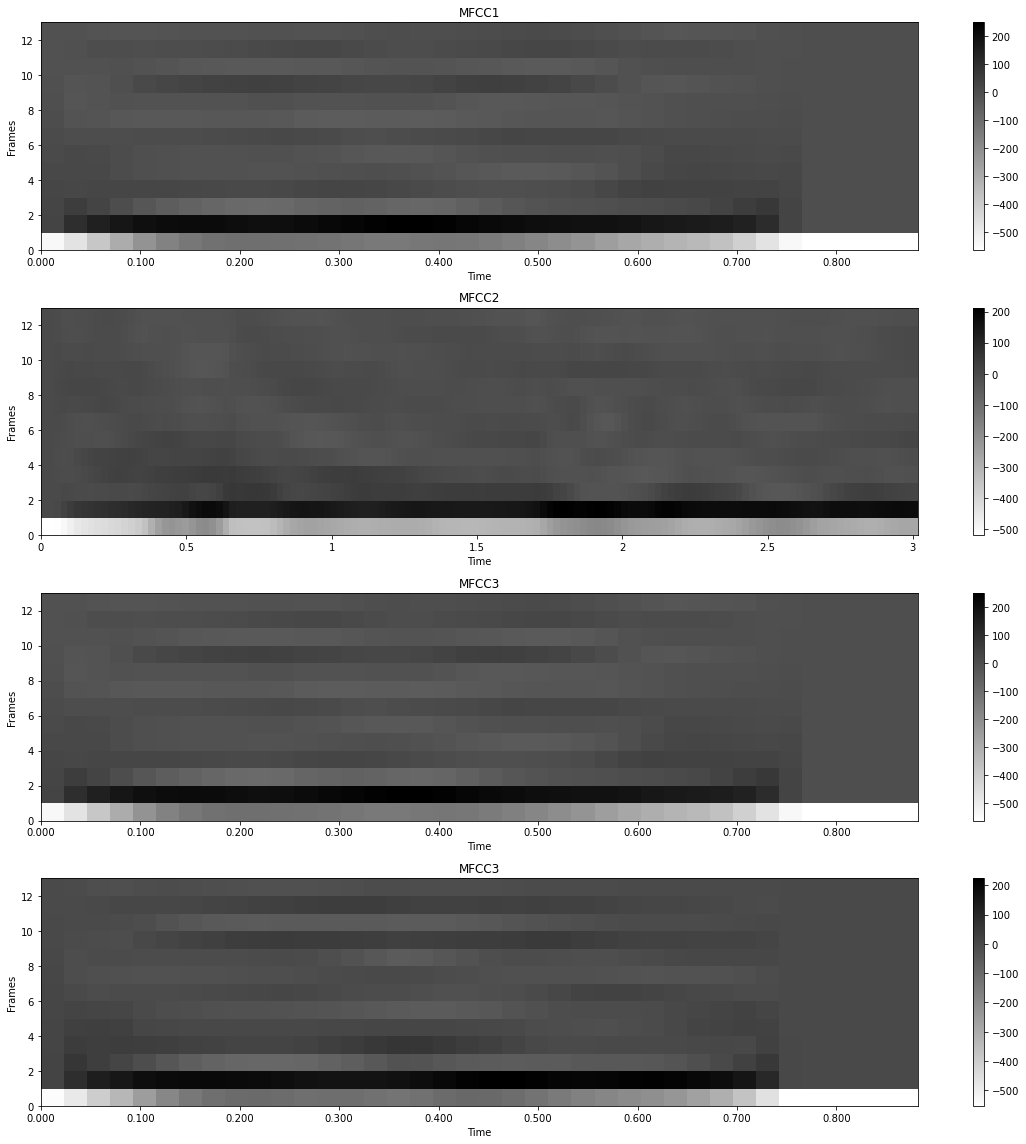

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.subplot(4, 1, 1)
librosa.display.specshow(mfcc1, x_axis='time',y_axis='frames',cmap='gray_r', hop_length=hop_size)
plt.title('MFCC1')
plt.colorbar()

plt.subplot(4, 1, 2)
librosa.display.specshow(mfcc2, x_axis='time',y_axis='frames',cmap='gray_r', hop_length=hop_size)
plt.title('MFCC2')
plt.colorbar()

plt.subplot(4, 1, 3)
librosa.display.specshow(mfcc3, x_axis='time',y_axis='frames',cmap='gray_r', hop_length=hop_size)
plt.title('MFCC3')
plt.colorbar()

plt.subplot(4, 1, 4)
librosa.display.specshow(mfcc4, x_axis='time',y_axis='frames',cmap='gray_r', hop_length=hop_size)
plt.title('MFCC3')
plt.colorbar()
plt.tight_layout()

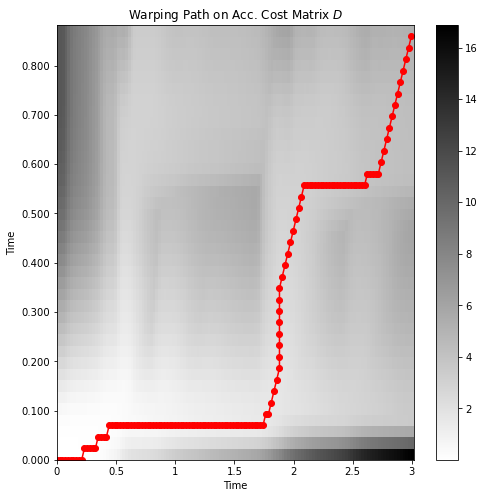

In [138]:
import librosa.sequence
import numpy as np
D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
wp_s = np.asarray(wp) * hop_size / sr1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()
# print(f"D shape = {D.shape} =>  {D}")
# print(f"wp = {wp}")

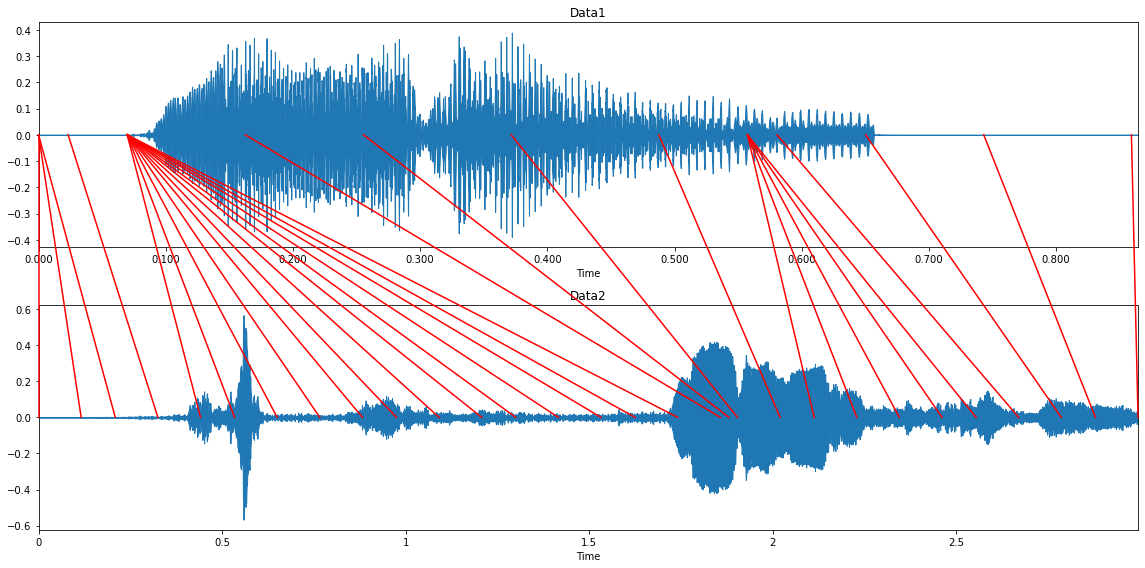

In [139]:
import matplotlib

fig = plt.figure(figsize=(16, 8))
# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(data1, sr=sr1)
plt.title('Data1')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(data2, sr=sr2)
plt.title('Data2')
ax2 = plt.gca()

plt.tight_layout()
trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30 
#Returns num evenly spaced samples, calculated over the interval [start, stop].
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / sr1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))
    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='red')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [110]:
# Distance between clip 1 and clip 2
print(data1)
d,path =fastdtw(data1, data2)
d

[0. 0. 0. ... 0. 0. 0.]


432.9130666724116